In [1]:
import pandas as pd
import numpy as np
import pm4py
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import Counter
import os
import seaborn as sns
import matplotlib.dates as mdates
from collections import defaultdict
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

In [2]:
#UPLOAD DATA FROM FILE

# Define the column indices with mixed types
mixed_type_columns = [11, 13, 14, 15, 16, 17, 18, 19]

# Create a  with the column indices and their intended data type
dtype_mapping = {col_idx: 'object' for col_idx in mixed_type_columns}

# Read the CSV file with the specified data types
click_log_raw = pd.read_csv("C:\\Users\90545\Documents\Business information systems\Dataset\dataset_1\BPI2016_Clicks_Logged_In.csv~\BPI2016_Clicks_Logged_In.csv", sep=';', encoding='latin1', dtype=dtype_mapping)

click_log = click_log_raw [["CustomerID", "AgeCategory", "Gender", "Office_U", "Office_W", "SessionID", "IPID", "TIMESTAMP", "VHOST", "URL_FILE", "PAGE_NAME", "REF_URL_category", "page_load_error", "page_action_detail_EN", "service_detail_EN", "tip_EN", "xps_info"]]
click_log.head(10)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info
0,2025826,50-65,V,313,313,12956475,620841,2015-10-05 10:12:56.880000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN
1,2025826,50-65,V,313,313,13243433,620841,2015-09-30 15:14:35.943000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN
2,1503890,30-39,V,247,247,14805466,1690840,2015-09-01 19:35:06.707000000,digid.werk.nl,/portal/page/portal/home/diensten/aanvragen-tw,aanvragen-tw,NaN,0,NaN,3. Send data,NaN,NaN
3,2063574,50-65,M,296,301,12710639,1632512,2015-11-06 10:47:42.137000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN
4,2185161,18-29,V,327,327,44281847,757955,2016-01-11 18:44:07.877000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/bijstan...,bijstandsuitkering,NaN,0,NaN,NaN,NaN,NaN
5,2074173,40-49,M,296,269,32607429,1855184,2015-11-09 22:43:19.973000000,www.werk.nl,/werk_nl/werknemer/solliciteren/europa/land/fr...,frankrijk,NaN,0,NaN,NaN,NaN,NaN
6,2140620,30-39,V,271,274,4752535,1723649,2015-11-02 11:39:37.567000000,digid.werk.nl,/werk_nl/werknemer/eintake/inschrijven,inschrijven,NaN,0,NaN,NaN,NaN,NaN
7,2099262,50-65,V,330,330,388094,967997,2015-10-28 17:00:52.393000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/inschri...,inschrijven,NaN,0,NaN,NaN,NaN,NaN
8,1626445,50-65,M,330,330,12239424,1268110,2015-08-27 21:03:34.143000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/inschri...,inschrijven,NaN,0,NaN,NaN,NaN,NaN
9,2096614,40-49,M,313,313,45886197,1916881,2016-01-19 10:44:52.140000000,digid.werk.nl,/portal/page/portal/home/diensten/aanvragen-tw,aanvragen-tw,NaN,0,NaN,NaN,NaN,NaN


In [3]:
# CONVERT THE TIMESTAMP AND SORT IT

click_log['TIMESTAMP'] = pd.to_datetime(click_log['TIMESTAMP'])
click_log.sort_values(by=['SessionID', 'TIMESTAMP'], ascending=[True, True], inplace=True)

C:\Users\90545\AppData\Local\Temp\ipykernel_13772\938480737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_log['TIMESTAMP'] = pd.to_datetime(click_log['TIMESTAMP'])
C:\Users\90545\AppData\Local\Temp\ipykernel_13772\938480737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_log.sort_values(by=['SessionID', 'TIMESTAMP'], ascending=[True, True], inplace=True)


In [4]:
# CREATE ACTIVITY COLUMN

selected_columns = ['VHOST', 'PAGE_NAME', 'REF_URL_category', 'page_action_detail_EN', 'service_detail_EN']
click_log['Activity'] = click_log[selected_columns].apply(tuple, axis=1).copy()
click_log

C:\Users\90545\AppData\Local\Temp\ipykernel_13772\2731102139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_log['Activity'] = click_log[selected_columns].apply(tuple, axis=1).copy()


,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity
3273278,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:22.780,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
5333642,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:40.767,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ..."
3733243,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:51.390,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
5904405,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:06.003,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
5573282,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:19.343,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613546,2209110,18-29,V,230,230,55314751,505057,2016-02-28 08:17:15.947,www.werk.nl,/werk_nl/werknemer/werkmap,werkmap,UWV,0,NaN,NaN,NaN,NaN,"(www.werk.nl, werkmap, UWV, nan, nan)"
2925569,2209110,18-29,V,230,230,55314751,505057,2016-02-28 08:18:10.877,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
4068602,2209110,18-29,V,230,230,55314751,505057,2016-02-28 08:18:41.493,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
5013440,2209110,18-29,V,230,230,55314751,505057,2016-02-28 08:19:59.737,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"


In [5]:
# MAKE DICTIONARY FOR ACTIVITY

activity_array = click_log['Activity'].unique()

activity_array_df = pd.DataFrame(activity_array, columns = ['Activity'])

unique_numbers = {element: index for index, element in enumerate(activity_array_df.apply(tuple, axis=1).unique())}
activity_array_df['UniqueNumber'] = activity_array_df.apply(tuple, axis=1).map(unique_numbers)

activity_array_df

,Activity,UniqueNumber
0,"(digid.werk.nl, taken, nan, nan, nan)",0
1,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ...",1
2,"(digid.werk.nl, mijn_documenten, nan, nan, nan)",2
3,"(digid.werk.nl, mijn_berichten, nan, nan, nan)",3
4,"(digid.werk.nl, mijn_werkmap, nan, nan, nan)",4
...,...,...
1004,"(www.werk.nl, loon-voor-na-ww, nan, nan, nan)",1004
1005,"(digid.werk.nl, aanvragen-ww, UWV, nan, 1. You...",1005
1006,"(digid.werk.nl, wijziging_doorgeven, DigID, na...",1006
1007,"(www.werk.nl, verkoop, nan, nan, nan)",1007


In [6]:
# GET THE STATISTICS

clicks_stat = click_log.groupby('CustomerID').agg({
    'SessionID': 'nunique',        # Number of sessions
    'VHOST': 'nunique',           # Number of unique VHOST
    'PAGE_NAME': 'nunique',     # Number of unique pages
    #'page_action_detail_EN': 'nunique',      # Number of unique actions
    #'service_detail_EN': 'nunique'        # Number of unique services
}).reset_index()

clicks_stat.columns = ['CustomerID', 'Number of sessions', 'Number of unique VHOST', 'Number of unique pages']

clicks_stat['Number of clicks'] = click_log.groupby('CustomerID').size().values

clicks_stat

,CustomerID,Number of sessions,Number of unique VHOST,Number of unique pages,Number of clicks
0,220,19,2,22,263
1,318,11,2,11,94
2,495,15,2,16,184
3,511,29,2,14,173
4,609,31,2,15,297
...,...,...,...,...,...
26642,2240369,3,2,12,23
26643,2240373,20,2,55,445
26644,2240374,1,2,4,24
26645,2240435,9,2,20,138


In [7]:
# ADD THE COLUMN INDICATING THE CASE DURATION DAYS

customer_activity_range = click_log.groupby('CustomerID')['TIMESTAMP'].agg(['min', 'max']).reset_index()

clicks_stat['case_duration_days'] = ((customer_activity_range['max'] - customer_activity_range['min']).dt.days + 1)

clicks_stat

,CustomerID,Number of sessions,Number of unique VHOST,Number of unique pages,Number of clicks,case_duration_days
0,220,19,2,22,263,79
1,318,11,2,11,94,171
2,495,15,2,16,184,120
3,511,29,2,14,173,216
4,609,31,2,15,297,120
...,...,...,...,...,...,...
26642,2240369,3,2,12,23,147
26643,2240373,20,2,55,445,36
26644,2240374,1,2,4,24,1
26645,2240435,9,2,20,138,41


In [8]:
# DELETE THE EXTREME OUTLIERS

def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

numeric_columns = ['Number of sessions', 'Number of unique pages', 'Number of clicks', 'case_duration_days']
outliers = clicks_stat[numeric_columns].apply(find_outliers)

clicks_stat_filtered = clicks_stat[~outliers.any(axis=1)]

clicks_stat_filtered

,CustomerID,Number of sessions,Number of unique VHOST,Number of unique pages,Number of clicks,case_duration_days
0,220,19,2,22,263,79
1,318,11,2,11,94,171
2,495,15,2,16,184,120
3,511,29,2,14,173,216
4,609,31,2,15,297,120
...,...,...,...,...,...,...
26641,2240366,13,2,15,165,19
26642,2240369,3,2,12,23,147
26644,2240374,1,2,4,24,1
26645,2240435,9,2,20,138,41


In [9]:
# FILTER CLICK_LOG BY THE CUSTOMER WHICH IS PRESENT IN THE CLICKS_STAT_FILTERED

merged_data = click_log.merge(clicks_stat_filtered[['CustomerID']], on='CustomerID')

merged_data

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity
0,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:22.780,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
1,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:40.767,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ..."
2,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:51.390,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
3,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:06.003,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:19.343,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861865,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:40.713,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_online_trainingen,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_online_trainingen, nan, n..."
4861866,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:53.417,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4861867,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:59.883,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
4861868,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:30:49.967,www.werk.nl,/xpsimage/wdo211825,wdo211825,NaN,0,NaN,NaN,NaN,image_211825,"(www.werk.nl, wdo211825, nan, nan, nan)"


In [10]:
# FILTER PAGES WITH LOAD ERROR

no_error_click_log = merged_data[merged_data["page_load_error"] == 0]
no_error_click_log

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity
0,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:22.780,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
1,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:40.767,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ..."
2,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:51.390,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
3,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:06.003,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:19.343,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861865,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:40.713,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_online_trainingen,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_online_trainingen, nan, n..."
4861866,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:53.417,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4861867,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:59.883,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
4861868,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:30:49.967,www.werk.nl,/xpsimage/wdo211825,wdo211825,NaN,0,NaN,NaN,NaN,image_211825,"(www.werk.nl, wdo211825, nan, nan, nan)"


In [11]:
# FIND THE SESSIONS WITH NULL DURATION

session_durations = no_error_click_log.groupby('SessionID')['TIMESTAMP'].apply(lambda x: x.max() - x.min())

session_durations = session_durations.reset_index()

session_durations.columns = ['SessionID', 'session_duration']

session_durations

,SessionID,session_duration
0,46,0 days 00:01:44.990000
1,92,0 days 00:00:00
2,358,0 days 00:19:55.800000
3,447,0 days 00:04:23.040000
4,510,0 days 00:00:00
...,...,...
459639,55312897,0 days 00:05:14.870000
459640,55313003,0 days 00:00:54.370000
459641,55313739,0 days 00:00:11.747000
459642,55314390,0 days 00:22:38.054000


In [12]:
# FILTER SESSIONS WITH NULL DURATION FROM DATASET

zero_durations = session_durations[session_durations['session_duration'] == pd.Timedelta(days=0)]

session_ids_to_delete = zero_durations['SessionID'].tolist()

null_duration_filtered = no_error_click_log[~no_error_click_log['SessionID'].isin(session_ids_to_delete)]

null_duration_filtered

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity
0,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:22.780,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
1,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:40.767,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ..."
2,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:51.390,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
3,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:06.003,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:19.343,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861865,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:40.713,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_online_trainingen,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_online_trainingen, nan, n..."
4861866,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:53.417,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4861867,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:59.883,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
4861868,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:30:49.967,www.werk.nl,/xpsimage/wdo211825,wdo211825,NaN,0,NaN,NaN,NaN,image_211825,"(www.werk.nl, wdo211825, nan, nan, nan)"


In [13]:
# FILTER CONCURRENT REPEATING CLICKS IN THE SAME SESSION

click_log_filtered_mask = null_duration_filtered.copy()

mask_top1 = click_log_filtered_mask['Activity'].eq(click_log_filtered_mask['Activity'].shift()) & (click_log_filtered_mask['SessionID'] == click_log_filtered_mask['SessionID'].shift(1)) & (click_log_filtered_mask['Activity'] == click_log_filtered_mask['Activity'].shift(1))
mask_top1.iloc[0] = False

click_log_filtered = click_log_filtered_mask[~mask_top1]

click_log_filtered.reset_index(drop=True, inplace=True)

click_log_filtered

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity
0,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:22.780,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)"
1,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:40.767,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ..."
2,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:51.390,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
3,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:06.003,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
4,1837760,50-65,M,247,247,1021876,1419591,2015-07-14 09:07:47.870,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038412,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:40.713,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_online_trainingen,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_online_trainingen, nan, n..."
2038413,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:53.417,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)"
2038414,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:59.883,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)"
2038415,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:30:49.967,www.werk.nl,/xpsimage/wdo211825,wdo211825,NaN,0,NaN,NaN,NaN,image_211825,"(www.werk.nl, wdo211825, nan, nan, nan)"


In [14]:
# ADD COLUMN OF CYPHED ACTIVITY

click_log_filtered['activity_cypher'] = click_log_filtered['Activity'].map(activity_array_df.set_index('Activity')['UniqueNumber'])

click_log_filtered

C:\Users\90545\AppData\Local\Temp\ipykernel_13772\2186163162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_log_filtered['activity_cypher'] = click_log_filtered['Activity'].map(activity_array_df.set_index('Activity')['UniqueNumber'])


,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity,activity_cypher
0,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:22.780,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0
1,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:40.767,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_sollicitaties, nan, nan, ...",1
2,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:07:51.390,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)",2
3,1837760,50-65,M,247,247,46,1419591,2015-11-06 08:08:06.003,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)",3
4,1837760,50-65,M,247,247,1021876,1419591,2015-07-14 09:07:47.870,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038412,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:40.713,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_online_trainingen,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_online_trainingen, nan, n...",25
2038413,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:53.417,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)",3
2038414,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:29:59.883,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,mijn_documenten,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)",2
2038415,2232043,30-39,V,296,291,55106323,2618110,2016-02-28 12:30:49.967,www.werk.nl,/xpsimage/wdo211825,wdo211825,NaN,0,NaN,NaN,NaN,image_211825,"(www.werk.nl, wdo211825, nan, nan, nan)",172


In [15]:
# CONVERT TO THE EVENT LOG WITH SESSION CASES

event_log_SessionID = click_log_filtered.copy()

event_log_SessionID.rename(columns={'TIMESTAMP': 'time:timestamp', 'SessionID': 'case:concept:name', 
                          'activity_cypher': 'concept:name'}, inplace=True)

event_log_SessionID = event_log_SessionID.sort_values(by=['case:concept:name', 'time:timestamp'])

event_log_SessionID = pm4py.format_dataframe(event_log_SessionID, case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')

event_log_SessionID

C:\Users\90545\AppData\Local\Temp\ipykernel_13772\1381739078.py:10: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  event_log_SessionID = pm4py.format_dataframe(event_log_SessionID, case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')


,CustomerID,AgeCategory,Gender,Office_U,Office_W,case:concept:name,IPID,time:timestamp,VHOST,URL_FILE,...,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity,concept:name,@@index,@@case_index
0,2019561,50-65,V,257,257,10000323,1411045,2015-07-21 20:19:34.013,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0,0,0
1,808550,50-65,M,327,321,10000597,1660123,2015-08-18 11:53:29.253,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,1,1
2,808550,50-65,M,327,321,10000597,1660123,2015-08-18 11:54:07.543,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0,2,1
3,1333121,30-39,V,271,278,10000674,1424064,2015-07-25 16:01:09.233,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_berichten, nan, nan, nan)",3,3,2
4,1333121,30-39,V,271,278,10000674,1424064,2015-07-25 16:02:40.123,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_cv, nan, nan, nan)",12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038412,2044721,50-65,M,257,261,9999937,1026691,2015-11-01 10:57:35.153,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_documenten, nan, nan, nan)",2,2038412,418663
2038413,2044721,50-65,M,257,261,9999937,1026691,2015-11-01 10:57:51.677,www.werk.nl,/werk_nl/werknemer/home,...,Logged Out,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, Logged Out, nan, nan)",7,2038413,418663
2038414,1457194,50-65,M,296,291,9999965,1002739,2015-09-21 19:27:03.647,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,2038414,418664
2038415,1457194,50-65,M,296,291,9999965,1002739,2015-09-21 19:27:38.417,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0,2038415,418664


In [16]:
# NUMBER OF EVENTS AND CASES

num_events_SessionID = len(event_log_SessionID)
num_cases_SessionID = len(event_log_SessionID['case:concept:name'].unique())
print("Number of events: {}\nNumber of cases: {}".format(num_events_SessionID, num_cases_SessionID))

Number of events: 2038417
Number of cases: 418665


In [17]:
# GET THE START ACTIVITIES OF THE EVENT LOG WITH SESSION CASES

event_log_start_activities_SessionID = pm4py.stats.get_start_activities(event_log_SessionID)
event_log_start_activities_SessionID

{'9': 98018,
 '0': 82077,
 '16': 63471,
 '3': 41963,
 '4': 14585,
 '8': 14550,
 '12': 13205,
 '30': 10060,
 '5': 9832,
 '10': 9511,
 '1': 7582,
 '2': 5233,
 '15': 3839,
 '7': 3780,
 '69': 3417,
 '13': 3412,
 '52': 3354,
 '22': 1956,
 '70': 1534,
 '54': 1446,
 '19': 1427,
 '14': 1410,
 '36': 1171,
 '155': 1009,
 '224': 960,
 '103': 880,
 '96': 782,
 '40': 770,
 '31': 732,
 '28': 713,
 '24': 665,
 '25': 654,
 '37': 559,
 '117': 554,
 '23': 551,
 '6': 524,
 '211': 517,
 '20': 446,
 '11': 445,
 '48': 441,
 '56': 436,
 '38': 412,
 '42': 374,
 '44': 363,
 '21': 362,
 '39': 320,
 '82': 284,
 '47': 282,
 '68': 264,
 '116': 254,
 '148': 241,
 '46': 233,
 '99': 210,
 '162': 209,
 '196': 191,
 '88': 179,
 '143': 154,
 '43': 148,
 '80': 143,
 '87': 133,
 '234': 131,
 '124': 127,
 '85': 124,
 '26': 119,
 '81': 117,
 '59': 117,
 '107': 117,
 '198': 113,
 '205': 113,
 '78': 112,
 '74': 109,
 '181': 104,
 '97': 104,
 '41': 100,
 '159': 99,
 '134': 98,
 '45': 97,
 '17': 95,
 '55': 92,
 '79': 90,
 '77':

In [18]:
# GET THE END ACTIVITIES OF THE EVENT LOG WITH SESSION CASES

event_log_end_activities_SessionID = pm4py.stats.get_end_activities(event_log_SessionID)
event_log_end_activities_SessionID

{'7': 156596,
 '0': 83675,
 '3': 31463,
 '5': 23909,
 '9': 15713,
 '12': 11935,
 '13': 11022,
 '1': 10860,
 '15': 8738,
 '4': 8543,
 '2': 7529,
 '20': 4089,
 '19': 3015,
 '11': 2632,
 '25': 2363,
 '22': 2213,
 '52': 1802,
 '14': 1713,
 '6': 1712,
 '40': 1671,
 '16': 1465,
 '24': 1183,
 '31': 1029,
 '28': 913,
 '64': 906,
 '10': 893,
 '37': 888,
 '29': 863,
 '67': 838,
 '97': 773,
 '224': 714,
 '39': 647,
 '30': 622,
 '58': 582,
 '92': 511,
 '102': 492,
 '23': 464,
 '36': 462,
 '93': 442,
 '103': 441,
 '68': 431,
 '38': 405,
 '84': 374,
 '70': 362,
 '8': 359,
 '74': 302,
 '85': 286,
 '148': 282,
 '125': 272,
 '78': 249,
 '59': 230,
 '205': 227,
 '55': 209,
 '50': 209,
 '98': 200,
 '124': 197,
 '106': 188,
 '82': 186,
 '126': 175,
 '107': 169,
 '180': 165,
 '69': 161,
 '56': 150,
 '136': 149,
 '183': 147,
 '32': 145,
 '220': 144,
 '117': 140,
 '194': 133,
 '105': 129,
 '87': 119,
 '237': 111,
 '42': 99,
 '290': 97,
 '116': 95,
 '48': 94,
 '77': 94,
 '203': 94,
 '212': 93,
 '134': 92,
 '1

# FILTERING
# START ACTIVITY (www.werk.nl, home, nan, nan, nan) AND END ACTIVITY 'www.werk.nl', 'home', 'Logged Out', nan, nan 

In [19]:
# FILTER THE CASES WITH START ACTIVITY (www.werk.nl, home, nan, nan, nan) FOR THE EVENT LOG WITH SESSION CASES

event_log_start_activity_top1_SessionID = pm4py.filter_start_activities(event_log_SessionID, {'9'})
event_log_start_activity_top1_SessionID

,CustomerID,AgeCategory,Gender,Office_U,Office_W,case:concept:name,IPID,time:timestamp,VHOST,URL_FILE,...,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity,concept:name,@@index,@@case_index
1,808550,50-65,M,327,321,10000597,1660123,2015-08-18 11:53:29.253,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,1,1
2,808550,50-65,M,327,321,10000597,1660123,2015-08-18 11:54:07.543,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0,2,1
12,573106,50-65,V,327,327,10001324,415679,2015-09-27 10:06:40.607,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,12,4
13,573106,50-65,V,327,327,10001324,415679,2015-09-27 10:06:43.957,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0,13,4
30,1777544,30-39,M,296,293,1000192,1242219,2015-08-31 14:00:33.803,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,30,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038401,1513279,30-39,V,257,265,999972,321308,2015-09-19 05:33:52.303,www.werk.nl,/zoeken_portlet/ajax/zoekAantalIndicatief,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, zoekAantalIndicatief, nan, nan, ...",50,2038401,418660
2038402,1513279,30-39,V,257,265,999972,321308,2015-09-19 05:34:08.450,www.werk.nl,/werk_nl/werknemer/vacatures,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, vacatures, nan, nan, nan)",19,2038402,418660
2038414,1457194,50-65,M,296,291,9999965,1002739,2015-09-21 19:27:03.647,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,2038414,418664
2038415,1457194,50-65,M,296,291,9999965,1002739,2015-09-21 19:27:38.417,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0,2038415,418664


In [20]:
# FILTER THE CASES WITH START ACTIVITY 'digid.werk.nl', 'taken', nan, nan, nan AND END ACTIVITY 'www.werk.nl', 'home', 'Logged Out', nan, nan 

event_log_activity_top1_SessionID = pm4py.filter_end_activities(event_log_start_activity_top1_SessionID, {'7'})
event_log_activity_top1_SessionID

,CustomerID,AgeCategory,Gender,Office_U,Office_W,case:concept:name,IPID,time:timestamp,VHOST,URL_FILE,...,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity,concept:name,@@index,@@case_index
84,1914683,40-49,V,257,230,10003136,1153573,2015-07-28 16:49:01.937,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,84,18
85,1914683,40-49,V,257,230,10003136,1153573,2015-07-28 16:49:37.500,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, vacatures_zoeken, nan, nan, nan)",13,85,18
86,1914683,40-49,V,257,230,10003136,1153573,2015-07-28 16:54:24.220,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, vacatures_bij_mijn_cv, nan, na...",5,86,18
87,1914683,40-49,V,257,230,10003136,1153573,2015-07-28 17:00:12.807,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0,87,18
88,1914683,40-49,V,257,230,10003136,1153573,2015-07-28 17:37:09.387,www.werk.nl,/werk_nl/werknemer/home,...,Logged Out,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, Logged Out, nan, nan)",7,88,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038379,1495823,40-49,V,313,318,9999174,1749898,2015-09-26 10:34:12.977,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,2038379,418656
2038380,1495823,40-49,V,313,318,9999174,1749898,2015-09-26 10:34:46.497,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, vacatures_bij_mijn_cv, nan, na...",5,2038380,418656
2038381,1495823,40-49,V,313,318,9999174,1749898,2015-09-26 11:10:47.107,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0,2038381,418656
2038382,1495823,40-49,V,313,318,9999174,1749898,2015-09-26 11:12:05.333,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, vacatures_zoeken, nan, nan, nan)",13,2038382,418656


In [21]:
# SORT ACTIVITIES IN THE ASCENDING WAY

sorted_event_log_SessionID_top1 = event_log_activity_top1_SessionID.groupby('case:concept:name').apply(lambda x: x.sort_values(by='time:timestamp', ascending=True))

sorted_event_log_SessionID_top1.reset_index(drop=True, inplace=True)

sorted_event_log_SessionID_top1

,CustomerID,AgeCategory,Gender,Office_U,Office_W,case:concept:name,IPID,time:timestamp,VHOST,URL_FILE,...,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity,concept:name,@@index,@@case_index
0,1914683,40-49,V,257,230,10003136,1153573,2015-07-28 16:49:01.937,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,84,18
1,1914683,40-49,V,257,230,10003136,1153573,2015-07-28 16:49:37.500,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, vacatures_zoeken, nan, nan, nan)",13,85,18
2,1914683,40-49,V,257,230,10003136,1153573,2015-07-28 16:54:24.220,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, vacatures_bij_mijn_cv, nan, na...",5,86,18
3,1914683,40-49,V,257,230,10003136,1153573,2015-07-28 17:00:12.807,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0,87,18
4,1914683,40-49,V,257,230,10003136,1153573,2015-07-28 17:37:09.387,www.werk.nl,/werk_nl/werknemer/home,...,Logged Out,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, Logged Out, nan, nan)",7,88,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225958,1495823,40-49,V,313,318,9999174,1749898,2015-09-26 10:34:12.977,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,2038379,418656
225959,1495823,40-49,V,313,318,9999174,1749898,2015-09-26 10:34:46.497,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, vacatures_bij_mijn_cv, nan, na...",5,2038380,418656
225960,1495823,40-49,V,313,318,9999174,1749898,2015-09-26 11:10:47.107,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0,2038381,418656
225961,1495823,40-49,V,313,318,9999174,1749898,2015-09-26 11:12:05.333,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, vacatures_zoeken, nan, nan, nan)",13,2038382,418656


In [22]:
# GET THE VARIANTS OF THE CASES WITH START ACTIVITY 'digid.werk.nl', 'taken', nan, nan, nan AND END ACTIVITY 'www.werk.nl', 'home', 'Logged Out', nan, nan WITH THE ACTIVITIES IN THE page_action_detail_EN AND service_detail_EN 

sorted_event_log_SessionID_filtered_variants_top1 = pm4py.get_variants(sorted_event_log_SessionID_top1)

variant_counts_top1 = Counter(sorted_event_log_SessionID_filtered_variants_top1)

variant_count_data_top1 = [{'Variant': variant, 'Count': count} for variant, count in variant_counts_top1.items()]

variant_count_df_top1 = pd.DataFrame(variant_count_data_top1)

variant_count_df_top1 = variant_count_df_top1.sort_values(by='Count', ascending=False)

variant_count_df_top1

,Variant,Count
1,"(9, 0, 7)",8548
6,"(9, 3, 7)",2467
38,"(9, 0, 3, 7)",966
22,"(9, 0, 1, 7)",963
46,"(9, 3, 0, 7)",947
...,...,...
4787,"(9, 0, 7, 103, 162, 40, 10, 116, 14, 7, 12, 7)",1
4788,"(9, 5, 9, 5, 4, 25, 5, 12, 7)",1
4789,"(9, 36, 3, 2, 0, 1, 0, 1, 7)",1
4790,"(9, 2, 3, 7, 39, 7, 9, 7)",1


In [24]:
# MAKE THE DATASET OF SESSION AND ACTIVITIES SEQUENCES 

sorted_event_log_SessionID_top1 = sorted_event_log_SessionID_top1.sort_values(by=['case:concept:name', 'time:timestamp'])

session_activity_data_top1 = []

current_session_top1 = None
session_activities_top1 = []

current_customer_id_top1 = None

for index, row in sorted_event_log_SessionID_top1.iterrows():
    session_id_top1 = row['case:concept:name']
    concept_name_top1 = row['concept:name']
    customer_id_top1 = row['CustomerID']  
    
    if session_id_top1 != current_session_top1:
        if current_session_top1 is not None:
            session_activity_data_top1.append([current_session_top1, current_customer_id_top1, session_activities_top1])
        current_session_top1 = session_id_top1
        session_activities_top1 = [concept_name_top1]
        current_customer_id_top1 = customer_id_top1  
    else:
        session_activities_top1.append(concept_name_top1)

if current_session_top1 is not None:
    session_activity_data_top1.append([current_session_top1, current_customer_id_top1, session_activities_top1])

session_activities_table_top1 = pd.DataFrame(session_activity_data_top1, columns=['SessionID', 'CustomerID', 'ActivitySequence'])

session_activities_table_top1

,SessionID,CustomerID,ActivitySequence
0,10003136,1914683,"[9, 13, 5, 0, 7]"
1,10004119,2091924,"[9, 0, 7]"
2,10004790,2041596,"[9, 52, 81, 7]"
3,10005827,1755295,"[9, 5, 0, 7]"
4,10010293,2052306,"[9, 0, 1, 15, 7]"
...,...,...,...
41327,9989363,2070302,"[9, 12, 3, 0, 7]"
41328,9993847,2078935,"[9, 0, 1, 3, 2, 52, 7]"
41329,9994960,2010670,"[9, 5, 0, 7]"
41330,9995870,127373,"[9, 12, 0, 7]"


In [25]:
# MAKE COMMON STATISTICS ABOUT ACTIVITY SEQUENCE

session_activities_table_top1['ActivitySequenceTuple'] = session_activities_table_top1['ActivitySequence'].apply(tuple)

sequence_customer_count_top1 = session_activities_table_top1.groupby('ActivitySequenceTuple')['CustomerID'].nunique().reset_index()

sequence_customer_count_top1 = sequence_customer_count_top1.rename(columns={'CustomerID': 'CustomerCount'})

sequence_customer_count_sorted_top1 = sequence_customer_count_top1.sort_values('CustomerCount', ascending = False)

sequence_customer_count_sorted_top1.columns = ['ActivitySequence', 'CustomerCount']

variant_count_df_top1['ActivitySequence'] = variant_count_df_top1['Variant'].apply(tuple)

merged_data_top1 = sequence_customer_count_sorted_top1.merge(variant_count_df_top1, on='ActivitySequence', how='left')

merged_data_top1.rename(columns={'Count': 'VariantCount'}, inplace=True)

merged_data_top1 = merged_data_top1.drop(['Variant'], axis=1)
merged_data_top1


,ActivitySequence,CustomerCount,VariantCount
0,"(9, 0, 7)",3603,8548
1,"(9, 3, 7)",1648,2467
2,"(9, 0, 3, 7)",770,966
3,"(9, 3, 0, 7)",755,947
4,"(9, 0, 1, 7)",746,963
...,...,...,...
12302,"(9, 1, 0, 7, 9, 0, 9, 56, 58, 20, 7)",1,1
12303,"(9, 1, 0, 7, 9, 1, 0, 5, 7)",1,1
12304,"(9, 1, 0, 7, 9, 24, 40, 41, 42, 43, 44, 45, 46...",1,1
12305,"(9, 1, 0, 84, 97, 19, 51, 50, 19, 51, 50, 19, ...",1,1


C:\Users\90545\AppData\Local\Temp\ipykernel_13772\2544312059.py:18: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


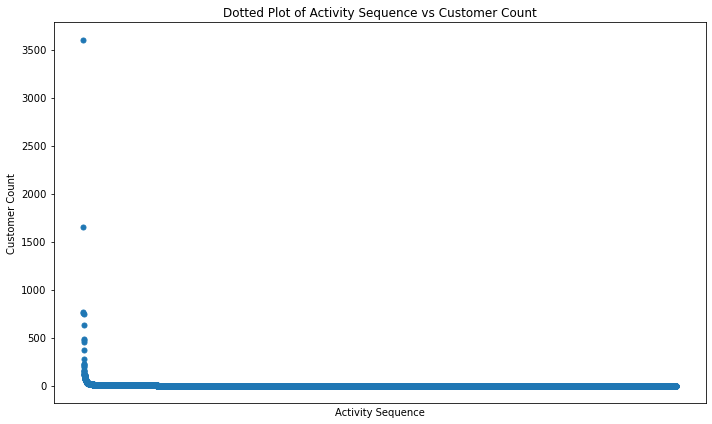

In [26]:
# DOTTED PLOT OF ACTIVITY SEQUENCE VS CUSTOMER COUNT

merged_data_plot = merged_data_top1.copy()

merged_data_plot['ActivitySequence'] = merged_data_plot['ActivitySequence'].apply(lambda x: ' -> '.join(map(str, x)))

activity_sequence_top1 = merged_data_plot['ActivitySequence']
customer_count_top1 = merged_data_top1['CustomerCount']

plt.figure(figsize=(10, 6))
plt.plot(activity_sequence_top1, customer_count_top1, marker='o', linestyle='', markersize=5)

plt.xlabel('Activity Sequence')
plt.ylabel('Customer Count')

plt.title('Dotted Plot of Activity Sequence vs Customer Count')

plt.xticks([])

plt.tight_layout()
plt.show()


In [27]:
# THE PERCENTAGE OF CUSTOMERS WHICH USED THE "POPULAR" ACTIVITY (>50 CUSTOMERS)

merged_data_top1_50 = merged_data_top1[merged_data_top1['CustomerCount'] >= 50]

res_perc = (merged_data_top1_50['CustomerCount'].sum() / merged_data_top1['CustomerCount'].sum()) * 100

res_perc

44.95691839837811

In [29]:
# THE LIST OF SESSIONS WITH ACTIVITY SEQUENCE USED MORE THAN 50 CUSTOMERS

session_activities_table_copy_top1 = session_activities_table_top1.copy()
merged_data_copy_top1 = merged_data_top1.copy()

session_activities_table_copy_top1['ActivitySequence'] = session_activities_table_copy_top1['ActivitySequence'].apply(tuple)

merged_dataset_top1 = session_activities_table_copy_top1.merge(merged_data_copy_top1[['ActivitySequence', 'CustomerCount']], on='ActivitySequence', how='left')

merged_dataset_top1['ActivitySequence'] = merged_dataset_top1['ActivitySequence'].apply(list)

filtered_sessions_top1 = merged_dataset_top1[merged_dataset_top1['CustomerCount'] >= 50]

session_id_list_top1 = filtered_sessions_top1['SessionID'].tolist()

filtered_event_log_50_top1 = sorted_event_log_SessionID_top1[sorted_event_log_SessionID_top1['case:concept:name'].isin(session_id_list_top1)]
filtered_event_log_50_top1


,CustomerID,AgeCategory,Gender,Office_U,Office_W,case:concept:name,IPID,time:timestamp,VHOST,URL_FILE,...,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,Activity,concept:name,@@index,@@case_index
5,2091924,30-39,V,296,293,10004119,909888,2015-10-16 15:05:03.670,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,111,26
6,2091924,30-39,V,296,293,10004119,909888,2015-10-16 15:06:09.167,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0,112,26
7,2091924,30-39,V,296,293,10004119,909888,2015-10-16 15:10:24.127,www.werk.nl,/werk_nl/werknemer/home,...,Logged Out,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, Logged Out, nan, nan)",7,113,26
12,1755295,50-65,M,305,304,10005827,1288973,2015-10-09 11:43:04.583,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,171,38
13,1755295,50-65,M,305,304,10005827,1288973,2015-10-09 11:44:17.077,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, vacatures_bij_mijn_cv, nan, na...",5,172,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225953,2010670,30-39,M,296,293,9994960,1396846,2015-08-06 09:07:03.143,www.werk.nl,/werk_nl/werknemer/home,...,Logged Out,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, Logged Out, nan, nan)",7,2038148,418615
225954,127373,40-49,V,330,330,9995870,656321,2015-07-05 22:36:46.750,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaN,NaN,NaN,NaN,"(www.werk.nl, home, nan, nan, nan)",9,2038201,418625
225955,127373,40-49,V,330,330,9995870,656321,2015-07-05 22:37:50.387,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, mijn_cv, nan, nan, nan)",12,2038202,418625
225956,127373,40-49,V,330,330,9995870,656321,2015-07-05 22:38:23.957,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaN,NaN,NaN,NaN,"(digid.werk.nl, taken, nan, nan, nan)",0,2038203,418625


In [30]:
# CONVERT TO THE EVENT LOG WITH SESSION CASES FOR VISUALIZATION

filtered_event_log_50_copy_top1 = filtered_event_log_50_top1.copy()

filtered_event_log_50_copy_top1.rename(columns={'concept:name': 'activity_cypher'}, inplace=True)

filtered_event_log_50_copy_top1.rename(columns={'time:timestamp': 'time:timestamp', 'case:concept:name': 'case:concept:name', 
                          'Activity': 'concept:name'}, inplace=True)

filtered_event_log_50_copy_top1 = filtered_event_log_50_copy_top1.sort_values(by=['case:concept:name', 'time:timestamp'])

filtered_event_log_50_copy_top1 = pm4py.format_dataframe(filtered_event_log_50_copy_top1, case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')

filtered_event_log_50_copy_top1

C:\Users\90545\AppData\Local\Temp\ipykernel_13772\543121286.py:12: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  filtered_event_log_50_copy_top1 = pm4py.format_dataframe(filtered_event_log_50_copy_top1, case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')


,CustomerID,AgeCategory,Gender,Office_U,Office_W,case:concept:name,IPID,time:timestamp,VHOST,URL_FILE,...,REF_URL_category,page_load_error,page_action_detail_EN,service_detail_EN,tip_EN,xps_info,concept:name,activity_cypher,@@index,@@case_index
0,2091924,30-39,V,296,293,10004119,909888,2015-10-16 15:05:03.670,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaT,NaT,NaN,NaT,"('www.werk.nl', 'home', nan, nan, nan)",9,0,0
1,2091924,30-39,V,296,293,10004119,909888,2015-10-16 15:06:09.167,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaT,NaT,NaN,NaT,"('digid.werk.nl', 'taken', nan, nan, nan)",0,1,0
2,2091924,30-39,V,296,293,10004119,909888,2015-10-16 15:10:24.127,www.werk.nl,/werk_nl/werknemer/home,...,Logged Out,0,NaT,NaT,NaN,NaT,"('www.werk.nl', 'home', 'Logged Out', nan, nan)",7,2,0
3,1755295,50-65,M,305,304,10005827,1288973,2015-10-09 11:43:04.583,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaT,NaT,NaN,NaT,"('www.werk.nl', 'home', nan, nan, nan)",9,3,1
4,1755295,50-65,M,305,304,10005827,1288973,2015-10-09 11:44:17.077,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,...,NaN,0,NaT,NaT,NaN,NaT,"('digid.werk.nl', 'vacatures_bij_mijn_cv', nan...",5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80371,2010670,30-39,M,296,293,9994960,1396846,2015-08-06 09:07:03.143,www.werk.nl,/werk_nl/werknemer/home,...,Logged Out,0,NaT,NaT,NaN,NaT,"('www.werk.nl', 'home', 'Logged Out', nan, nan)",7,80371,22697
80372,127373,40-49,V,330,330,9995870,656321,2015-07-05 22:36:46.750,www.werk.nl,/werk_nl/werknemer/home,...,NaN,0,NaT,NaT,NaN,NaT,"('www.werk.nl', 'home', nan, nan, nan)",9,80372,22698
80373,127373,40-49,V,330,330,9995870,656321,2015-07-05 22:37:50.387,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,...,NaN,0,NaT,NaT,NaN,NaT,"('digid.werk.nl', 'mijn_cv', nan, nan, nan)",12,80373,22698
80374,127373,40-49,V,330,330,9995870,656321,2015-07-05 22:38:23.957,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,...,NaN,0,NaT,NaT,NaN,NaT,"('digid.werk.nl', 'taken', nan, nan, nan)",0,80374,22698


# PROCESS DISCOVERY
# START ACTIVITY ('digid.werk.nl', 'taken', nan, nan, nan) AND END ACTIVITY 'www.werk.nl', 'home', 'Logged Out', nan, nan 

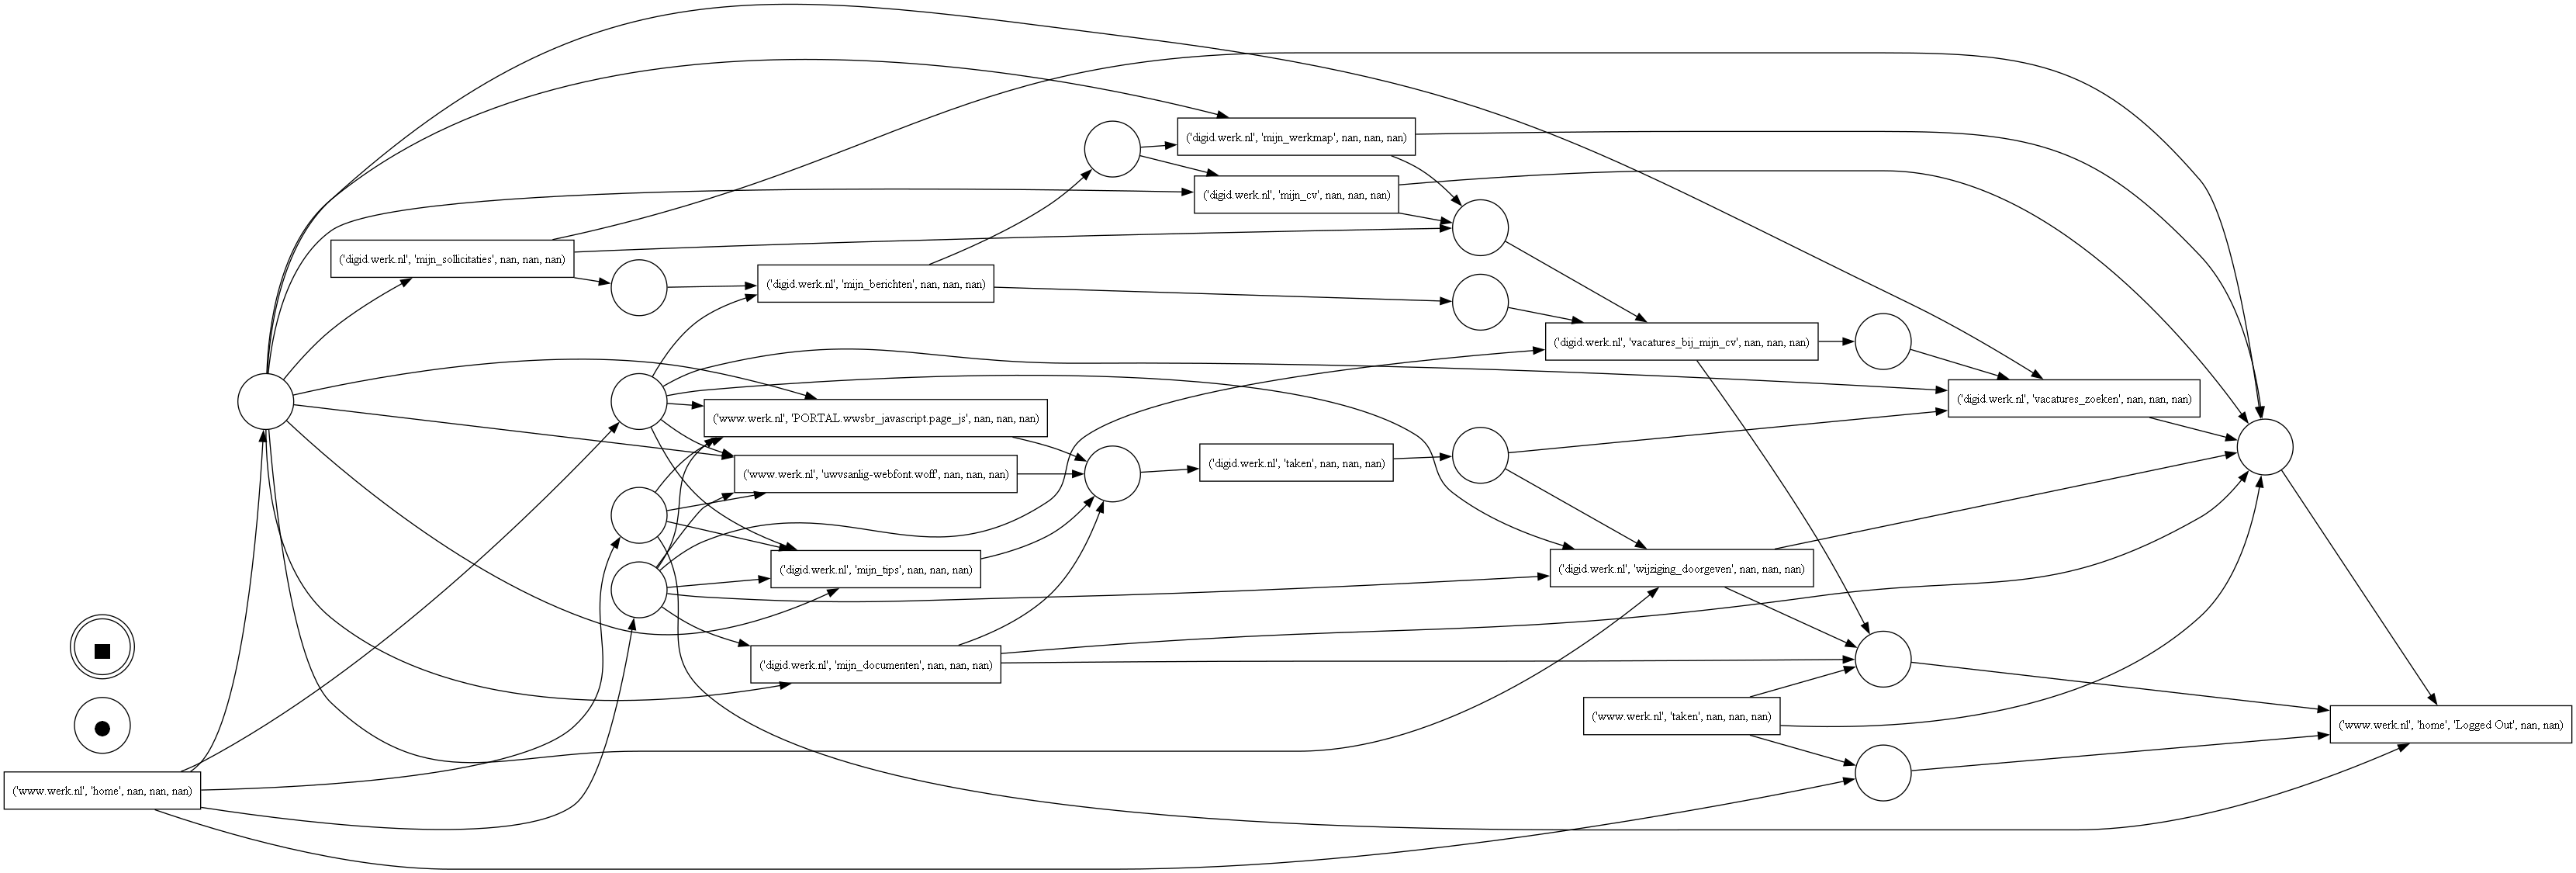

In [31]:
# ALPHA MINER

net_alpha_top1, im_alpha_top1, fm_alpha_top1 = pm4py.discovery.discover_petri_net_alpha(filtered_event_log_50_copy_top1)
pm4py.view_petri_net(net_alpha_top1, im_alpha_top1, fm_alpha_top1, format = 'png')

In [32]:
# CONFORMANCE ANALYSIS (FITNESS FOR ALPHA MINER)

fitness_alpha_top1 = pm4py.fitness_token_based_replay(filtered_event_log_50_copy_top1, net_alpha_top1, im_alpha_top1, fm_alpha_top1)
fitness_alpha_top1

replaying log with TBR, completed variants ::   0%|          | 0/60 [00:00<?, ?it/s]

{'perc_fit_traces': 0.0,
 'average_trace_fitness': 0.40790983470615727,
 'log_fitness': 0.41790852624933106,
 'percentage_of_fitting_traces': 0.0}

In [33]:
# CONFORMANCE ANALYSIS (PRECISION FOR ALPHA MINER)

prec_alpha_top1 = pm4py.precision_token_based_replay(filtered_event_log_50_copy_top1, net_alpha_top1, im_alpha_top1, fm_alpha_top1)
prec_alpha_top1

replaying log with TBR, completed variants ::   0%|          | 0/65 [00:00<?, ?it/s]

0.3911541219676501

In [34]:
# CONFORMANCE ANALYSIS (GENERALIZATION FOR ALPHA MINER)

gen_alpha_top1 = generalization_evaluator.apply(filtered_event_log_50_copy_top1, net_alpha_top1, im_alpha_top1, fm_alpha_top1)
gen_alpha_top1

replaying log with TBR, completed variants ::   0%|          | 0/60 [00:00<?, ?it/s]

0.9547321551858198

In [35]:
# CONFORMANCE ANALYSIS (SIMPLICITY FOR ALPHA MINER)

simp_alpha_top1 = simplicity_evaluator.apply(net_alpha_top1)
simp_alpha_top1

0.3069306930693069

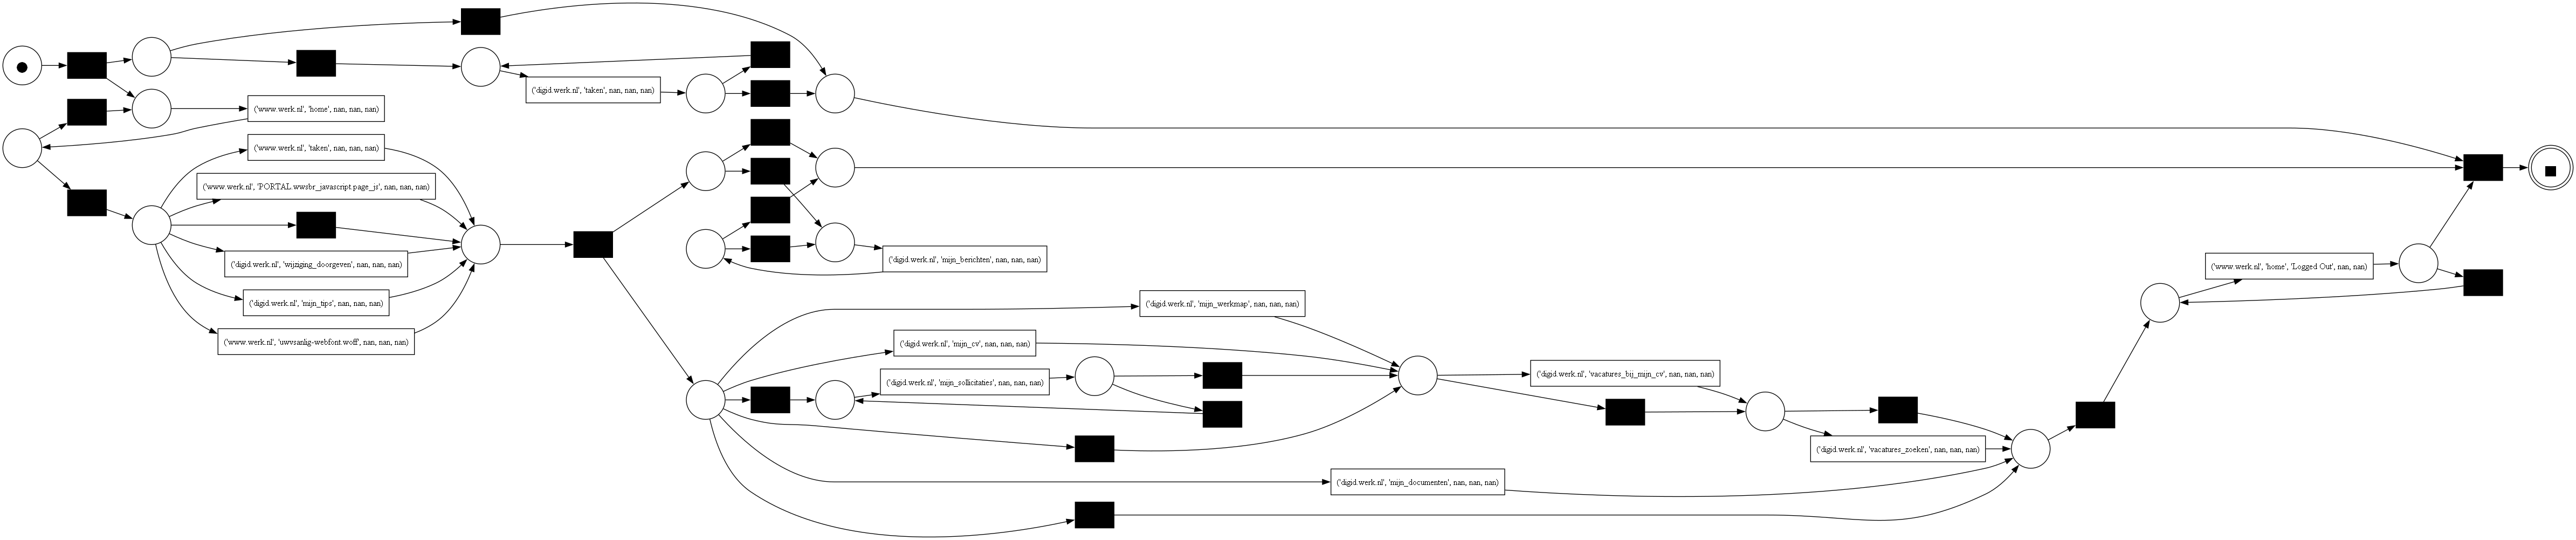

In [36]:
# INDUCTIVE MINER

net_induc_top1, im_induc_top1, fm_induc_top1 = pm4py.discover_petri_net_inductive(filtered_event_log_50_copy_top1)
pm4py.view_petri_net(net_induc_top1, im_induc_top1, fm_induc_top1, format = 'png')

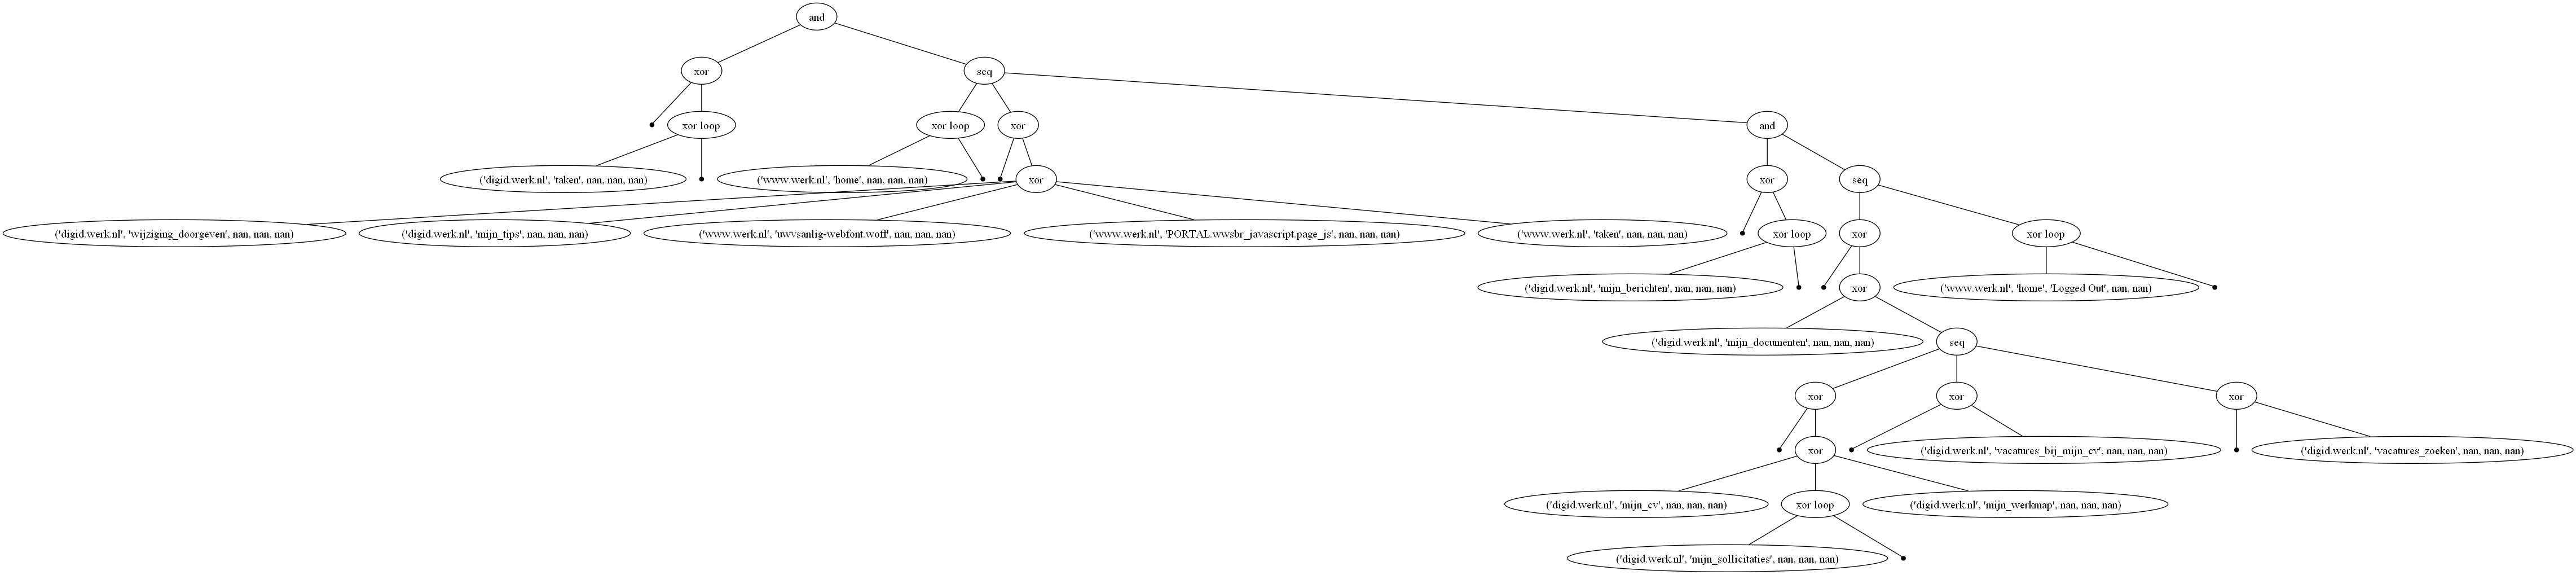

In [43]:
# INDUCTIVE MINER (PROCESS TREE)

tree_inductive = pm4py.discover_process_tree_inductive(filtered_event_log_50_copy_top1)
pm4py.view_process_tree(tree_inductive)

In [38]:
# CONFORMANCE ANALYSIS (FITNESS FOR INDUCTIVE MINER)

fitness_induc_top1 = pm4py.fitness_token_based_replay(filtered_event_log_50_copy_top1, net_induc_top1, im_induc_top1, fm_induc_top1)
fitness_induc_top1

replaying log with TBR, completed variants ::   0%|          | 0/60 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [39]:
# CONFORMANCE ANALYSIS (PRECISION FOR INDUCTIVE MINER)

prec_induc_top1 = pm4py.precision_token_based_replay(filtered_event_log_50_copy_top1, net_induc_top1, im_induc_top1, fm_induc_top1)
prec_induc_top1

replaying log with TBR, completed variants ::   0%|          | 0/65 [00:00<?, ?it/s]

0.4750349503451573

In [40]:
# CONFORMANCE ANALYSIS (GENERALIZATION FOR INDUCTIVE MINER)

gen_induc_top1 = generalization_evaluator.apply(filtered_event_log_50_copy_top1, net_induc_top1, im_induc_top1, fm_induc_top1)
gen_induc_top1

replaying log with TBR, completed variants ::   0%|          | 0/60 [00:00<?, ?it/s]

0.9680873768880194

In [41]:
# CONFORMANCE ANALYSIS (SIMPLICITY FOR INDUCTIVE MINER)

simp_induc_top1 = simplicity_evaluator.apply(net_induc_top1)
simp_induc_top1

0.6000000000000001

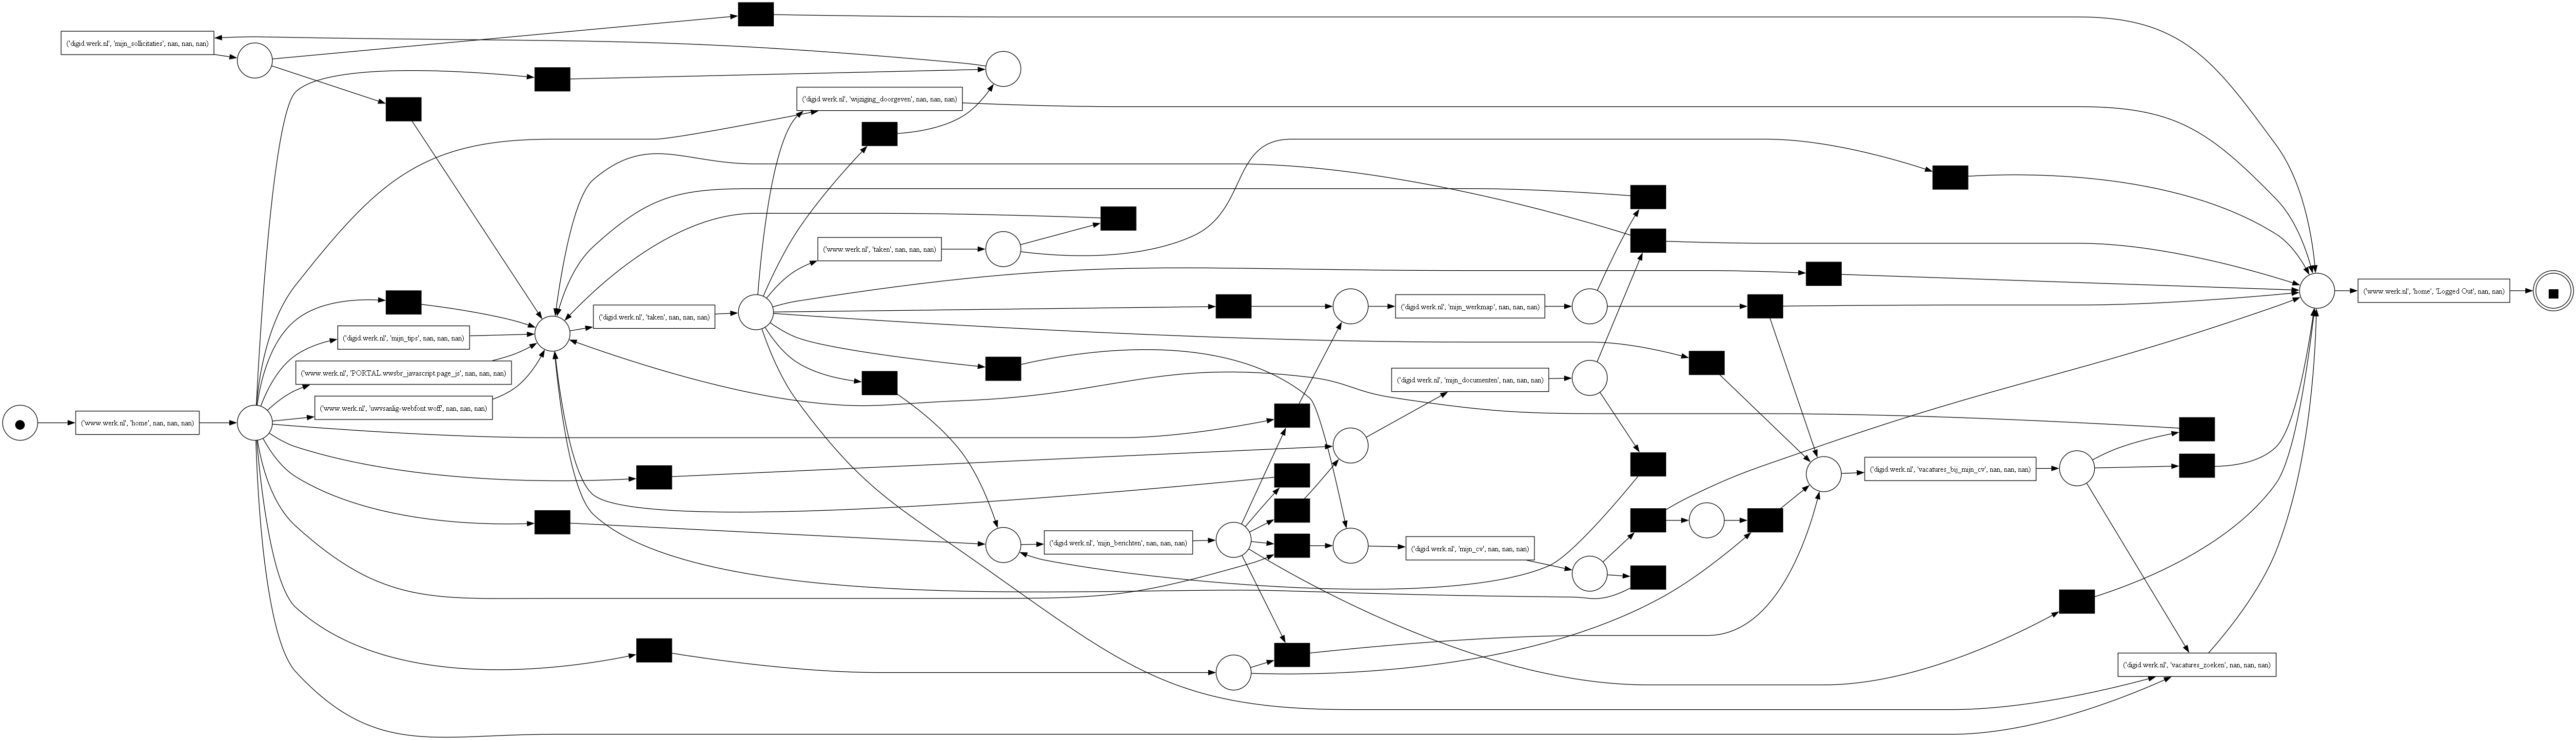

In [63]:
# HEURISTIC MINER (PETRI NET)

net_heu_top1, im_heu_top1, fm_heu_top1 = pm4py.discover_petri_net_heuristics(filtered_event_log_50_copy_top1, dependency_threshold=0.9)
pm4py.view_petri_net(net_heu_top1, im_heu_top1, fm_heu_top1)

In [64]:
# CONFORMANCE ANALYSIS (FITNESS FOR HEURISTIC MINER)

fitness_heu_top1 = pm4py.fitness_token_based_replay(filtered_event_log_50_copy_top1, net_heu_top1, im_heu_top1, fm_heu_top1)
fitness_heu_top1

replaying log with TBR, completed variants ::   0%|          | 0/60 [00:00<?, ?it/s]

{'perc_fit_traces': 77.78756773426142,
 'average_trace_fitness': 0.9645324132427158,
 'log_fitness': 0.9677355216324892,
 'percentage_of_fitting_traces': 77.78756773426142}

In [65]:
# CONFORMANCE ANALYSIS (PRECISION FOR HEURISTIC MINER)

prec_heu_top1 = pm4py.precision_token_based_replay(filtered_event_log_50_copy_top1, net_heu_top1, im_heu_top1, fm_heu_top1)
prec_heu_top1

replaying log with TBR, completed variants ::   0%|          | 0/65 [00:00<?, ?it/s]

0.6822597118497968

In [66]:
# CONFORMANCE ANALYSIS (GENERALIZATION FOR HEURISTIC MINER)

gen_heu_top1 = generalization_evaluator.apply(filtered_event_log_50_copy_top1, net_heu_top1, im_heu_top1, fm_heu_top1)
gen_heu_top1

replaying log with TBR, completed variants ::   0%|          | 0/60 [00:00<?, ?it/s]

0.8895717844558145

In [67]:
# CONFORMANCE ANALYSIS (SIMPLICITY FOR HEURISTIC MINER)

simp_heu_top1 = simplicity_evaluator.apply(net_heu_top1)
simp_heu_top1

0.49253731343283585

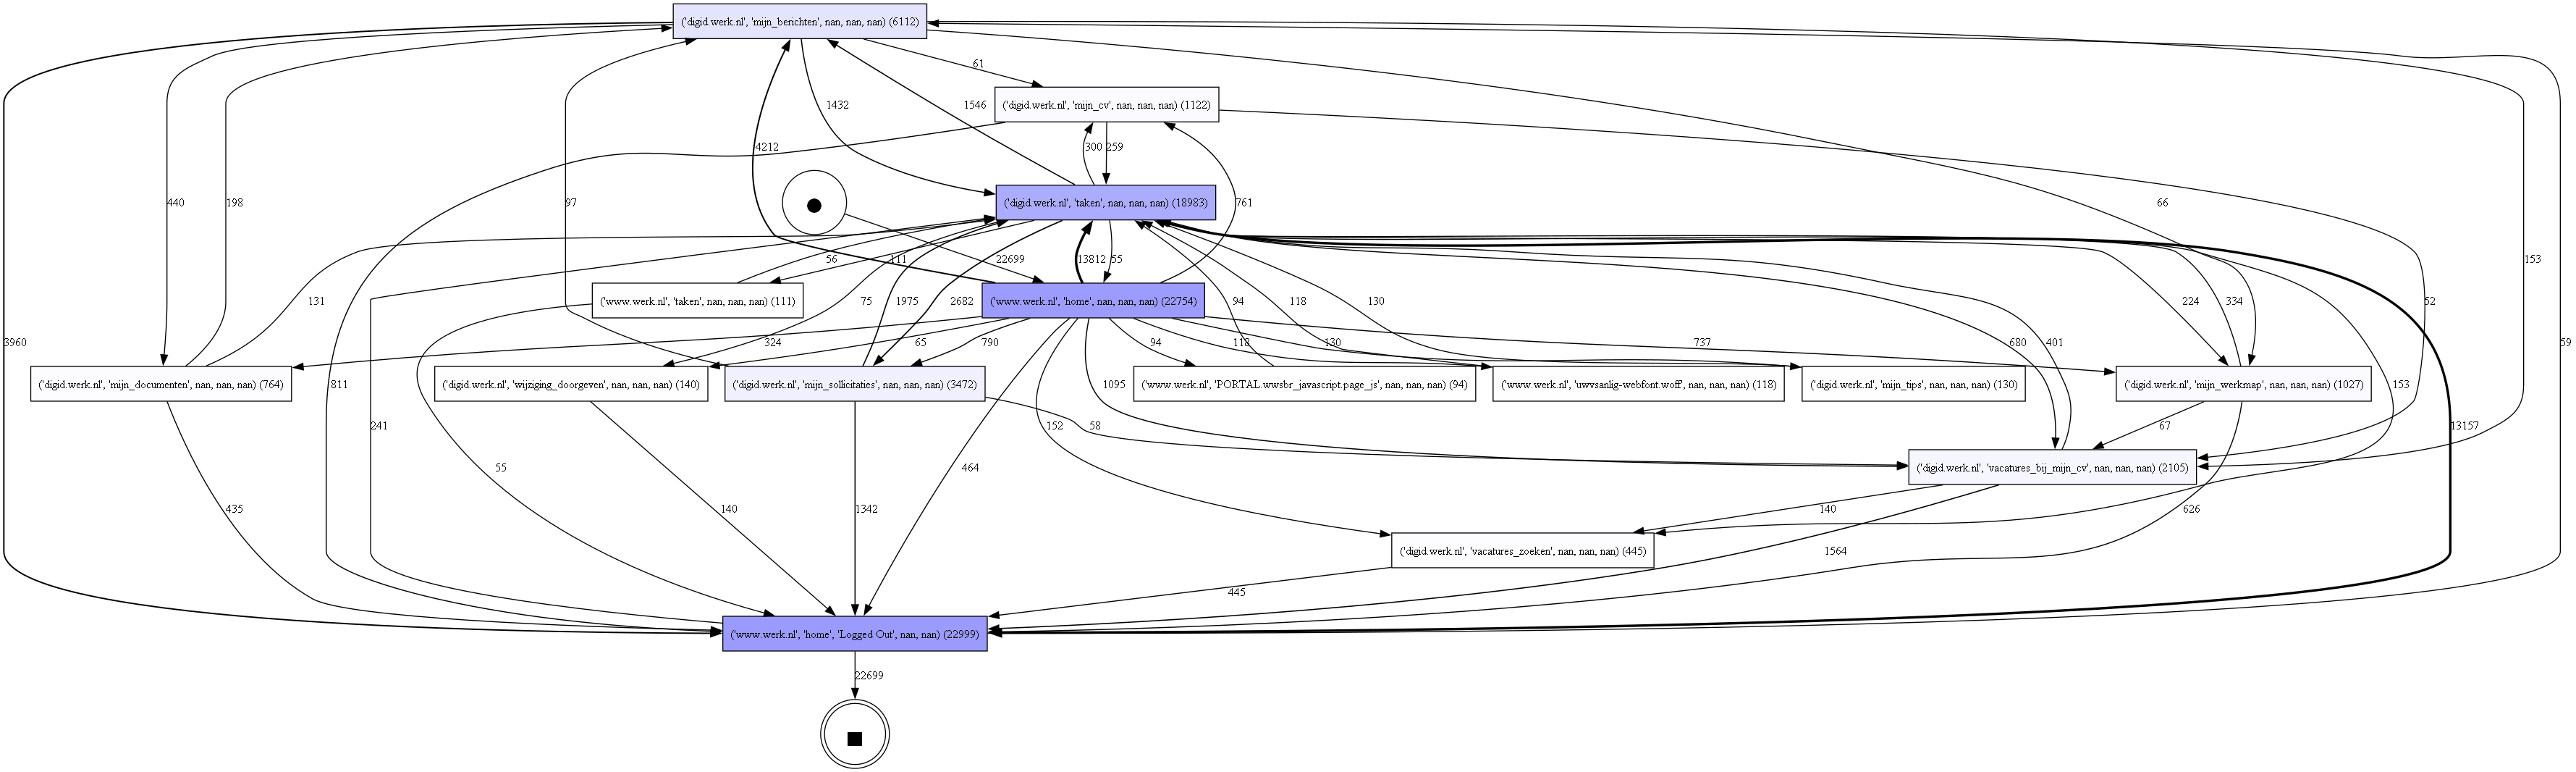

In [48]:
# DFG GRAPH

dfg_top1, start_dfg_top1, end_dfg_top1 = pm4py.discover_dfg(filtered_event_log_50_copy_top1)
pm4py.view_dfg(dfg_top1, start_dfg_top1, end_dfg_top1, format='png')